In [1]:
from glob import glob
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def clahe(img, clip_limit=2.0, tile_grid_size=(8, 8)):
    if img.dtype != np.uint8:
        raise TypeError("clahe supports only uint8 inputs")

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    if len(img.shape) == 2:
        img = clahe.apply(img)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        img[:, :, 0] = clahe.apply(img[:, :, 0])
        img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)

    return img

In [6]:
def subtract_median_bg_image(im):
    k = np.max(im.shape)//20*2+1
    bg = cv2.medianBlur(im, k)
    return cv2.addWeighted (im, 4, bg, -4, 128)

In [3]:
file_list = glob('./sample/AMD*')

(-0.5, 2839.5, 1831.5, -0.5)

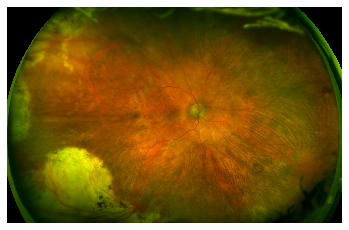

In [4]:
plt.imshow(cv2.cvtColor(cv2.imread(file_list[0]), cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 2839.5, 1831.5, -0.5)

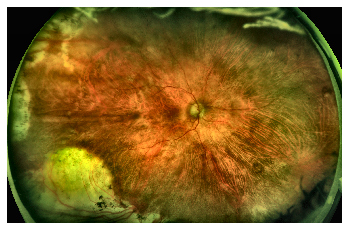

In [5]:
plt.imshow(clahe(cv2.cvtColor(cv2.imread(file_list[0]), cv2.COLOR_BGR2RGB)))
plt.axis('off')

In [9]:
plt.imshow(subtract_median_bg_image(cv2.cvtColor(cv2.imread(file_list[0]), cv2.COLOR_BGR2RGB)))
plt.axis('off')

error: OpenCV(4.1.2) C:/projects/opencv-python/opencv/modules/imgproc/src/median_blur.simd.hpp:337: error: (-215:Assertion failed) b < 16 in function 'cv::opt_AVX2::medianBlur_8u_O1'
